# Introdução ao ML - Classificação (Regressão Logística, Árvore e Modelos Ensemble)
**Autor:** [Anderson França](https://www.linkedin.com/in/anderson-m-franca/) | **Contato:** [github.com/andfranca](https://github.com/andfranca/estatistica-e-aprendizado-de-maquinas-ptbr)

<a href="https://creativecommons.org/licenses/by/4.0/deed.en"><img align="left" width="80" src="https://mirrors.creativecommons.org/presskit/buttons/88x31/png/by-nc.png"/></a>


A classificação é uma das principais tarefas em machine learning supervisionado, cujo objetivo é prever uma classe ou categoria para uma observação baseada em suas características. Em vez de prever um valor contínuo, como na regressão, a classificação lida com a previsão de um valor discreto, ou seja, um rótulo ou categoria que corresponde a uma classe específica.

Alguns exemplos de problemas de classificação são:

- Decidir se um contrato é fraude ou não;
- Atribuir um diagnóstico de um paciente com base nas características observadas do paciente (idade, pressão arterial, presença ou ausência de certos sintomas, etc.)
- Detectar notícias falsas

## Classificação Binária e Multiclasse

- **Classificação Binária:** É o tipo mais simples de classificação, onde há apenas duas possíveis categorias ou rótulos. Exemplo: prever se um paciente será readmitido no hospital dentro de um determinado período após a alta, com as classes sendo "readmissão" e "não readmissão".


- **Classificação Multiclasse:** O modelo precisa escolher entre três ou mais classes. Exemplo:  prever diferentes tipos de doenças respiratórias com base em características clínicas dos pacientes, como frequência respiratória, nível de oxigenação, presença de febre e padrões identificados em exames de imagem.


## Principais Algoritmos - Scikit Learning

O Scikit-Learn oferece inúmeros algoritmos de classificação. Entre eles:

- **Regressão Logística:** Um dos algoritmos mais simples e comuns, que será aprofundado na sequência.
- **Árvore de Decisão:** Algoritmo que constrói uma árvore para tomar decisões com base em regras de divisão.
- **k-Nearest Neighbors:** Classifica um ponto com base nas classes de seus vizinhos mais próximos.
- **Support Vector Machines:** Algoritmo que tenta encontrar uma fronteira ótima entre as classes.

Para mais detalhes sobre todos os algoritmos disponíveis e como utilizar, basta acessar a documentação da biblioteca em: [scikit-learn](https://scikit-learn.org/stable/supervised_learning.html)

# Banco de Dados Saída de Funcionários

O Conjunto de Dados Sintético de Saída de Empregados é um conjunto de dados simulado projetado para a análise e previsão da evasão de empregados. Ele contém informações detalhadas sobre vários aspectos do perfil de um empregado, incluindo dados demográficos, características relacionadas ao trabalho e circunstâncias pessoais.

O conjunto de dados é composto por 74.498 amostras, divididas em conjuntos de treinamento e teste para facilitar o desenvolvimento e a avaliação de modelos. Cada registro inclui um ID exclusivo do Empregado e características que influenciam a evasão de empregados. O objetivo é entender os fatores que contribuem para a evasão e desenvolver modelos preditivos para identificar empregados em risco.

A base de dados pode ser obtida em: [Employee Attrition Classification Dataset](https://www.kaggle.com/datasets/stealthtechnologies/employee-attrition-dataset)


In [31]:
# Importando bibliotecas
import pandas as pd

In [32]:
#Definir base de treinamento e teste
df = pd.read_csv('https://raw.githubusercontent.com/andfranca/proadi-sus-ciencia-de-dados-ia/refs/heads/main/bases/base_atrito.csv',low_memory=False)

In [33]:
#Inspecionar estrutura do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   74498 non-null  int64 
 1   ID                           74498 non-null  int64 
 2   Idade                        74498 non-null  int64 
 3   Genero                       74498 non-null  object
 4   Anos na Empresa              74498 non-null  int64 
 5   Area de Atuacao              74498 non-null  object
 6   Salario                      74498 non-null  int64 
 7   Equilibrio vidatrabalho      74498 non-null  object
 8   Satisfacao Trabalho          74498 non-null  object
 9   Taxa de desempenho           74498 non-null  object
 10  Numero de promocoes          74498 non-null  int64 
 11  Hora Extra                   74498 non-null  object
 12  Distancia casa trabalho      74498 non-null  int64 
 13  Nivel de Educacao            74

# Pré-Processamento
São etapas realizadas antes do treinamento do modelo, que visam preparar os dados de forma que eles sejam adequados e eficazes para a construção de modelos de machine learning.

Existem diversas técnicas para input de dados, normalização e codificação de variáveis. No momento, vamos utilizar a codificação das variáveis utilizando o Label Encoder do Sklearn.

### Label Encoder

O LabelEncoder mapeia cada valor categórico para um número inteiro. Por exemplo, se você tiver uma coluna com os valores `["Masculino", "Feminino"]`, o LabelEncoder pode transformá-la em `[0, 1]` ou `[1, 0]`, dependendo da ordem em que os valores aparecem.

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
#Selecionar uma coluna com uma coluna
df_genero = df[['Genero']]
df_genero.head()

,Genero
0,Masculino
1,Feminino
2,Feminino
3,Feminino
4,Masculino


In [36]:
#Criar um encoder para variavel
label_encoder = LabelEncoder()

#Criar uma nova coluna chamada Codificado
df_genero.loc[:,'Codificado'] = label_encoder.fit_transform(df_genero['Genero'])
df_genero.head()

<ipython-input-36-33c4b630f807>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genero.loc[:,'Codificado'] = label_encoder.fit_transform(df_genero['Genero'])


,Genero,Codificado
0,Masculino,1
1,Feminino,0
2,Feminino,0
3,Feminino,0
4,Masculino,1


In [37]:
### Selecionar variaveis categóricas
variaveis_categoricas = df.select_dtypes(include=['object']).columns
variaveis_categoricas

Index(['Genero', 'Area de Atuacao', 'Equilibrio vidatrabalho',
       'Satisfacao Trabalho', 'Taxa de desempenho', 'Hora Extra',
       'Nivel de Educacao', 'Status Civil', 'Nivel no Trabalho',
       'Tamanho da empresa', 'Trabalho remoto', 'Oportunidade de Lideranca',
       'Inovacao', 'Reputacao da Empresa', 'Reconhecimento Funcionarios'],
      dtype='object')

In [38]:
# Criar um dicionário para armazenar os LabelEncoders
label_encoders = {}

# Aplicar LabelEncoder a cada coluna categórica
for i in variaveis_categoricas:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])
    label_encoders[i] = le

In [39]:
#Criar um dicionário para a visualização desses dados codificados
chave = label_encoders['Genero'].classes_
valor = label_encoders['Genero'].transform(chave)
dicionario = dict(zip(chave, valor))
print(dicionario)

{'Feminino': 0, 'Masculino': 1}


# Modelagem
### Particionamento da base

O particionamento dos dados é muito importante para o desenvolvimento de modelos de aprendizado de máquina robustos, garantindo que sejam confiáveis, generalizem bem e tenham resultados precisos e replicáveis.

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
# Definir variáveis independente e dependentes
x = df.drop(['Deixou a empresa'], axis=1)
y = df['Deixou a empresa']

In [42]:
#Definir bases de treino e teste, com 80% para treinamento do modelo
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.20,
                                                    random_state = 42)

### Regressão Logística

A regressão logística é um modelo estatístico muito utilizado para prever a probabilidade de ocorrência de um evento binário, com base em variáveis independentes. É muito útil quando precisamos prever a probabilidade de uma observação pertencer a uma classe específica. Por exemplo:

- Fraude / Não Fraude
- Compra / Não compra
- Ocorre / Não ocorre
- 0 / 1

#### **Principais características:**
- A variável depende (resposta) é binária, ou seja, assume apenas dois valores possíveis `0 ou 1`
- Ao contrário da regressão linear, a logística modela a probabilidade de a variável dependente pertencer a uma determinada categoria. A saída é uma probabilidade estimada entre 0 e 1.
- A relação entre as variáveis independentes e a probabilidade de ocorrência é modelada pela função logística.

$$
P(Y=1 \mid X) = \frac{1}{1 + e^{-\beta_0 - \beta_1 X_1 - \dots - \beta_p X_p}}
$$

>> Onde:
- P(Y = 1 | X) é a probabilidade condicional de Y ser 1 dado X
- e é a base do logaritmo natural
- β0,β1,…,βp são os coeficientes do modelo estimados


- Com base na probabilidade estimada, é possível definir um limiar (geralmente 0.5) para classificar as observações em uma das duas classes. Por exemplo, quando a probabilidade de fraude for maior do que 0.5, a observação vai ser caracterizada como fraude. Caso contrário, será marcado como não fraude.

### Regressão Logística - Statsmodels

A `statsmodels` é uma poderosa biblioteca em Python usada para realizar estimativas estatísticas, modelagem de dados e testes de hipóteses. Muito utilizada em análises de regressão, séries temporais e econometria.

A principal característica da statsmodels é que ela oferece ferramentas estatísticas robustas e detalhadas, além de fornecer saídas completas e bem documentadas para a análise de modelos.

Para mais informações sobre a biblioteca, acesse: [statsmodels.org](https://www.statsmodels.org/)

Utilizamos a biblioteca statsmodels em Python para realizar uma regressão logística, pois teremos mais controle sobre a saída e será possível obter mais detalhes sobre os coeficientes, significância estatística e outros indicadores do modelo. Isso é muito útil quando buscamos uma análise mais explicativa e interpretável.

Os passos são:

- **Importar as bibliotecas necessárias** (`pandas`, `statsmodels`, etc)
- **Carregar dados**
- **Pré-processar os dados:** (tratamento de valores ausentes, normalização, categorização, etc.)
- **Adicionar uma constante:** (necessária para o modelo estimar o intercepto)
- **Ajustar o modelo:** (`Logit()` seguido de `.fit()`)
- **Avaliar o modelo:** (analisando coeficientes, significância estatística, métricas como pseudo-R², testes de razão de verossimilhança, etc.)


In [43]:
#Carregar biblioteca Statsmodels
import statsmodels.api as sm

# Adiciona a constante (intercepto) para o modelo
X_const = sm.add_constant(X_train)

# Ajustar o modelo de regressão logística
modelo = sm.Logit(y_train, X_const).fit()

# Exibir o resumo dos resultados do modelo
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.512375
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       Deixou a empresa   No. Observations:                59598
Model:                          Logit   Df Residuals:                    59573
Method:                           MLE   Df Model:                           24
Date:                Tue, 11 Mar 2025   Pseudo R-squ.:                  0.2594
Time:                        23:50:33   Log-Likelihood:                -30537.
converged:                       True   LL-Null:                       -41232.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.0901      0.073      1.238      0.216   

### Regressão Logística - Scikit-Learn

O Scikit-learn é uma biblioteca de machine learning muito popular em Python, que oferece uma variedade de algoritmos para classificação, regressão, clustering e processamento de dados. Ela é amplamente utilizada devido à sua simplicidade e eficiência, fornecendo ferramentas prontas para o desenvolvimento de modelos, avaliação de desempenho e manipulação de dados.

Para mais informações sobre a biblioteca, acesse: [scikit-learn.org](scikit-learn.org)

In [44]:
#Carregar a biblioteca de regressão logística
from sklearn.linear_model import LogisticRegression

In [45]:
#Ajustar o modelor de regressão logística
modelo_log = LogisticRegression(random_state = 0)
modelo_log.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [46]:
#Previsão do modelo
y_pred_log = modelo_log.predict(X_test)

# Métricas de Classificação

Métricas de classificação são indicadores usados para avaliar o desempenho de modelos em tarefas de classificação, onde o objetivo é prever rótulos discretos (categorias ou classes).

Essas métricas ajudam a entender quão bem o modelo está prevendo as classes corretas e são essenciais para comparar modelos e otimizar seus resultados.

Vamos analisar as métricas mais utilizadas:

- Matriz de Confusão
- Acurácia
- Precision
- Recall
- F1-Score


### Matriz de Confusão

A matriz de confusão é uma tabela que permite a visualização do desempenho de um algoritmo de classificação. Cada linha da matriz representa as instâncias em uma classe real, enquanto cada coluna representa as instâncias em uma classe prevista, ou vice-versa.


<table style="background:#FFFFFF;" align="center">
    
<tbody><tr>
<td rowspan="2" style="border:none;background:#FFFFFF;">
</td>
<td style="border:none; background:#FFFFFF;" >
</td>
<td colspan="2" style="background:#bbeeee;"><b>Previsto</b>
</td></tr>
<tr>
<td style="background:#ffffff;">
</td>
<td style="background:#ccffff;"><b>Negativo (PN)</b>
</td>
<td style="background:#ccffff;"><b>Positivo (PP)</b>
</td></tr>
<tr>
<td rowspan="2" ><div ><b>Atual</b></div>
</td>
<td style="background:#ccffff;"><b>Negativo (N)</b>
</td>
<td style="background:#ccffcc;"><b>Verdadeiro negativo</a> (TN) <br></b>
</td>
<td style="background:#ffdddd;"><b>Falso Positivo</a> (FP) <br></b>
</td></tr>
<tr>
<td style="background:#ccffff;"><b>Positivo (P)</b>
</td>
<td style="background:#ffcccc;"><b>Falso Negativo</a> (FN) <br></b>
</td>
<td style="background:#bbeebb;"><b>Verdadeiro positivo</a> (TP) <br></b>
</td></tr>
<tr>

</td></tr></tbody></table>

[Origem da Tabela](https://en.wikipedia.org/wiki/Sensitivity_and_specificity)


- Verdadeiros Positivos (TP)
- Falsos Positivos (FP) - Erro Tipo I
- Verdadeiros Negativos (TN)
- Falsos Negativos (FN) - Erro tipo II


Resumindo as métricas
- TP = Era verdadeiro e o modelo previu verdadeiro
- FP = Era falso e o modelo previu verdadeiro
- TN = Era falso e o modelo previu falso
- FN = Era verdadeiro e o modelo previu falso


In [47]:
#Matriz de Confusão usando sklearn
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred_log)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[4943 2861]
 [3248 3848]]


O resultado da matriz tem:

- 4.943 verdadeiro negativo
- 3.248 Falso Negativo
- 2.861 Falso Positivo
- 3.848 Verdadeiro Positivo

### Acurácia (ACC)
Indica a performance geral do modelo. Dentre todas as classificações, quantas o modelo classificou corretamente

$$
\text{Acurácia} = \frac{\text{Previsões corretas}}{\text{Total de previsões}}
$$

A acurácia é um bom indicador geral de como o modelo performou. Porém, pode haver situações em que ela é enganosa.

In [48]:
#Calculando a acurácia com o Sklearn
acc = metrics.accuracy_score(y_test, y_pred_log)

print(f"A taxa total de acerto do modelo é {acc :.2%}")

A taxa total de acerto do modelo é 59.00%


### Precision (PPV)

Valor preditivo positivo  (PPV)

Dentre **todas** as classificações de classe Positivo que o modelo fez, quantas estão corretas


$$
\text{Precision} = \frac{TP}{TP + FP}
$$


A precisão pode ser usada em uma situação em que os **Falsos Positivos** são considerados mais prejudiciais que os Falsos Negativos.

In [49]:
#Calculando o precision com o Sklearn

precision = metrics.precision_score(y_test, y_pred_log)
print ("Precision :", precision)

print(f"O precision indica que de todas as previsões positivas, o modelo acertou {precision :.2%}")

Precision : 0.5735579072887167
O precision indica que de todas as previsões positivas, o modelo acertou 57.36%


### Recall (TPR)

Sensibilidade ou Taxa de Verdadeiros Positivos

O recall é o número de pessoas que o modelo identificou corretamente como tendo diabetes dividido pelo número total de pessoas que realmente têm a doença.


$$
\text{Recall} = \frac{TP}{TP + FN}
$$



O recall pode ser usada em uma situação em que os **Falsos Negativos** são considerados mais prejudiciais que os Falsos Positivos.


In [50]:
#Calculando o recall com o Sklearn

recall = metrics.recall_score(y_test, y_pred_log)
print ("Precision :", recall)

print(f"O recall indica que de todos os valores observados positivos, o modelo acertou {recall :.2%}")

Precision : 0.5422773393461104
O recall indica que de todos os valores observados positivos, o modelo acertou 54.23%


### F-1 Score

Média harmônica de Precision e Recall:


$$
\text{F1 Score} = \frac{2 \cdot \text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$


O F1-Score é uma maneira de observar somente 1 métrica. É uma média harmônica entre o precision e o recall, que está muito mais próxima dos menores valores do que uma média aritmética simples. Ou seja, quando tem-se um F1-Score baixo, é um indicativo de que ou a precisão ou o recall está baixo.


In [51]:
#Calculando o F-1 Score com o Sklearn

f1 = metrics.f1_score(y_test, y_pred_log)
print ("F-1 Score :", f1)

F-1 Score : 0.5574791742122419


Mais informações sobre as métricas do sklearn, acesse: [Metrics Sklearn](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)

In [52]:
print(metrics.classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.60      0.63      0.62      7804
           1       0.57      0.54      0.56      7096

    accuracy                           0.59     14900
   macro avg       0.59      0.59      0.59     14900
weighted avg       0.59      0.59      0.59     14900



#### Quando usar cada uma?

- **Acurácia:** Útil quando as classes estão balanceadas e você quer um indicador geral.
- **Precisão:** Importante quando você quer minimizar os falsos positivos (como em detecção de fraudes).
- **Recall:** Essencial quando os falsos negativos são mais críticos (como em diagnósticos de doenças).
- **F1-Score:** Bom para cenários com dados desbalanceados, quando você quer equilibrar precisão e recall.


# Árvore de Decisão

A árvore de decisão é uma das técnicas mais utilizadas no aprendizado supervisionado. A árvore pode ser utilizada para resolver problemas de Regressão e Classificação, sendo mais utilizada para problemas de classificação.

O algoritmo é estruturado em árvore com três tipos de nós:
- Nó Raiz: é o nó inicial, onde estão todos os dados da base a ser analisada
- Nó Intermediário / Decision Node: cada nó representa a característica e seus ramos representam a decisão
- Folha: é o resultado final do algoritmo


<div>
<img src="https://lh6.googleusercontent.com/uzWz5uPIB3vswsYdcK4qgZHPOx7DmW8KVGt71WW8qerYmozQr3U2y-Uv1djlSJkbDaY=w1200-h630-p" width="400" align="center"/>
    
</div>


### Vantagens de utilizar a árvore de decisão

- **Fácil de Interpretar**: O output do modelo é fácil de ser entendido até por pessoas que não possuem conhecimentos analíticos. O output gráfico é muito intuitivo e os usuários podem facilmente utilizá-lo para relatar suas hipóteses.
- **Útil para a exploração dos dados**: A árvore de decisão é uma forma fácil de identificar as variáveis com maior significância e relação entre duas ou mais variáveis
- **Não é preciso fazer uma limpeza profunda nos dados**: Quando comparado a outras técnicas, não precisamos nos aprofundar no tratamento dos dados, pois, a árvore de decisão não é afetada por outliers ou dados faltantes (missings)
- **O tipo do dado não é uma restrição**: Esse modelo pode lidar tanto com variáveis numéricas e categóricas
- **É um método não paramétrico**: A árvore de decisão é considerada um método não paramétrico. Ou seja, as árvores de decisão não têm hipóteses sobre a distribuição espacial e a estrutura classificadora.

### Desvantagens:

- **Overfitting**:   O overfitting é uma das maiores dificuldades mais práticas para os modelos de árvore de decisão. Esse problemas podemos resolver definindo restrições nos parâmetros do modelo e  na poda.

- **Não lida tão bem com variáveis contínuas**: ao trabalhar com variáveis numéricas contínuas, a árvore de decisão perde informações quando classifica variáveis em diferentes categorias.

- As previsões das árvores de decisão não são suaves nem contínuas, mas aproximações constantes por partes, como visto na figura acima. Portanto, eles não são bons em extrapolação.

In [53]:
#Importar bibliotecas
from sklearn.tree import DecisionTreeClassifier

In [54]:
#Ajustar um modelo de Árvore de Decisão
modelo_ar = DecisionTreeClassifier(random_state=42)
modelo_ar = modelo_ar.fit(X_train, y_train)

In [55]:
#Previsão do modelo
y_pred_ar = modelo_ar.predict(X_test)

In [56]:
#Matriz de confusão
matriz_dt = metrics.confusion_matrix(y_test, y_pred_ar)
print ("Confusion Matrix : \n", matriz_dt)

Confusion Matrix : 
 [[5400 2404]
 [2528 4568]]


In [57]:
#Métricas de Classificação
print(metrics.classification_report(y_test, y_pred_ar))

              precision    recall  f1-score   support

           0       0.68      0.69      0.69      7804
           1       0.66      0.64      0.65      7096

    accuracy                           0.67     14900
   macro avg       0.67      0.67      0.67     14900
weighted avg       0.67      0.67      0.67     14900



In [60]:
#from sklearn.tree import plot_tree
#import matplotlib.pyplot as plt

#plt.figure(figsize=(20, 8))
#plot_tree(modelo_ar, filled=True, feature_names=x.columns, fontsize=10, precision=2)
#plt.show()

## Ajuste da Árvore - Hiperparâmetros

Um hiperparâmetro é um parâmetro externo que controla o comportamento do processo de aprendizado. Ao contrário dos parâmetros internos (como coeficientes em uma regressão linear ou pesos em uma rede neural), que são aprendidos automaticamente durante o treinamento do modelo, os hiperparâmetros precisam ser definidos antes do processo de treinamento.

```python
DecisionTreeClassifier(criterion='gini',
                       max_depth=5,
                       min_samples_split=10,
                       min_samples_leaf=5,
                       max_features='sqrt',
                       random_state=42)


## Principais Hiperparâmetros
> - **criterion:** Função para medir a qualidade da divisão.
> -- Opções: `gini` (padrão), `entropy`.
> - **max_depth:** Profundidade máxima da árvore.
> -- Controla o tamanho e complexidade.
> - **min_samples_split:** Número mínimo de amostras para dividir um nó.
> -- Valores: Inteiro ou proporção (`float`).
> - **min_samples_leaf:** Número mínimo de amostras por folha.
> -- Valores: Inteiro ou proporção (`float`).
> - **max_features:** Número máximo de features consideradas para divisão.
> -- Opções: `auto`, `sqrt`, `log2`, `int`, `float`.
> - **max_leaf_nodes:** Número máximo de folhas.
> -- Limita a complexidade da árvore.
> - **min_impurity_decrease:** Redução mínima na impureza para dividir.
> -- Controla a qualidade das divisões.
> - **class_weight:** Pesos das classes para lidar com desbalanceamento.
> -- Opções: None, 'balanced'.
> - **ccp_alpha:** Parâmetro de poda da árvore.
> -- Controla a complexidade via poda.


## Resumindo por objetivo
- **Controlar a complexidade:** Use max_depth, min_samples_split, min_samples_leaf, e max_leaf_nodes para evitar que a árvore fique muito complexa (overfitting).
- **Melhorar a qualidade da divisão:** Escolha um criterion adequado (gini, entropy para classificação; squared_error, mae para regressão).
- **Poda e regularização:** Use ccp_alpha para controlar a complexidade por meio da poda.


# Bagging (Bootrap Aggregating)

Combina múltiplos modelos de aprendizado de máquina treinados em amostras aleatórias dos dados de treinamento, com o objetivo de melhorar a precisão e a robustez das previsões e reduzindo o risco de overfitting.

O processo de bagging envolve a criação de várias amostras de bootstrap (amostras com reposição) dos dados originais. Cada amostra é usada para treinar um modelo independente. As previsões desses modelos são combinadas para produzir uma previsão final.

<div>
<img src="https://drive.google.com/uc?export=view&id=1loqCxddMDojWOahLusuepEiDmtO-CPMV" width="400" align="center"/>
    
</div>



O **Bagging** cria um conjunto de modelos a partir de diferentes amostras de um mesmo conjunto de dados. Podemos dividir o modelo em três etapas principais:

- **Criar subconjuntos de dados:** Gera várias amostras do conjunto de treinamento usando amostragem com reposição (bootstrap).
-**Treinar múltiplos modelos:** Cada subconjunto de dados treina um modelo independente, geralmente do mesmo tipo.
- **Combinar previsões:**
  - Classificação: votação majoritária
  - Regressão: média das previsões.


## Vantagens do Bagging

- Redução do overfitting – Torna o modelo mais generalizável e robusto.
- Aumento da estabilidade das previsões – Pequenas variações nos dados não impactam fortemente o resultado.
- Aplicável a diferentes algoritmos – Pode ser usado com Árvores de Decisão, SVMs e Redes Neurais.
- Resistência a outliers – Modelos treinados separadamente reduzem o impacto de valores extremos.

## Pontos a Considerar
- **Maior custo computacional:** Treinar múltiplos modelos exige mais processamento.
- **Interpretação mais complexa:** Combinando várias previsões, torna-se mais difícil entender cada decisão individual.
- **Necessidade de dados suficientes:** Como os dados são reamostrados, conjuntos muito pequenos podem não se beneficiar tanto.

# Random Forest

O **Random Forest** é um algoritmo de ensemble learning baseado em bagging que combina múltiplas árvores de decisão para obter maior precisão, estabilidade e generalização, reduzindo problemas como overfitting e alta variância.

Ele é projetado para melhorar a precisão das previsões e a robustez do modelo, corrigindo algumas limitações das árvores de decisão individuais, como o overfitting e sensibilidade a pequenas variações nos dados

<div>
<img src="https://drive.google.com/uc?export=view&id=19QbLWLIsNYgx4q9MvqFpa185RGezSHr5" width="600" align="center"/>
    
</div>




## Etapas do Random Forest

- **Construção das Árvores (Bootstrapping):** O modelo gera várias amostras aleatórias da base usando o bootstrap e cada árvore é treinada de forma independente com cada amostra.
- **Seleção aleatória de variáveis:** Diferente da árvore de decisão, onde podemos usar todas as variáveis, no Random Forest cada árvore escolhe um subconjunto aleatório de variáveis para decidir a melhor divisão dos nós.  
- **Combinação das Previsões:** As previsões das árvores são combinadas. Para classificação, usa-se votação majoritária, e para regressão, a média das previsões das árvores é utilizada.





| **VANTAGENS**                                   | **DESVANTAGENS**                              |
|------------------------------------------------|----------------------------------------------|
| **Reduz overfitting** – Ao combinar múltiplas árvores, evita que o modelo memorize os dados de treino. | **Maior custo computacional** – Exige mais tempo e memória do que uma única árvore. |
| **Estabilidade e precisão** – Pequenas variações nos dados não afetam tanto o modelo. | **Menor interpretabilidade** – Com muitas árvores, pode ser difícil entender a lógica da previsão. |
| **Importância das variáveis** – Permite avaliar quais variáveis influenciam mais as previsões. | **Inferência mais lenta** – Consultar várias árvores pode tornar a previsão menos eficiente em tempo real. |
| **Versatilidade** – Funciona bem para classificação e regressão. | **Menos eficiente em alta dimensionalidade** – Se houver muitas variáveis, pode ser necessário aplicar redução de dimensionalidade (PCA, Seleção de Variáveis). |


In [61]:
#Carregar bibliotecas necessárias
from sklearn.ensemble import RandomForestClassifier

In [62]:
#Definir os hiperparâmetros do modelo
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=0)

## Hiperparâmetros do modelo

Os hiperparâmetros são configurações pré-definidas que controlam o funcionamento do algoritmo antes do treinamento. Diferente dos parâmetros do modelo (como os pesos em uma regressão linear ou os splits de uma árvore de decisão, que são aprendidos durante o treinamento), os hiperparâmetros precisam ser ajustados manualmente ou por técnicas de otimização para obter o melhor desempenho.

| **Parâmetro**        | **Descrição**                                      | **Impacto**                                                                 |
|----------------------|--------------------------------------------------|---------------------------------------------------------------------------|
| **n_estimators**     | Número de árvores na floresta.                   | Maior = Mais estabilidade, mas maior custo computacional.                 |
| **max_depth**        | Profundidade máxima das árvores.                  | Limitar evita overfitting, mas reduzir demais pode causar underfitting.   |
| **max_features**     | Número máximo de variáveis consideradas por nó.   | Menos variáveis = mais diversidade entre árvores.                         |
| **min_samples_split** | Mínimo de amostras para dividir um nó.           | Valores muito pequenos podem gerar overfitting.                           |
| **random_state**     | Semente aleatória para reprodutibilidade.         | Garante que os resultados sejam sempre os mesmos.                         |
| **min_samples_leaf** | Mínimo de amostras para formar uma folha.         | Valores menores tornam a árvore mais sensível aos dados, enquanto valores maiores reduzem overfitting. |
| **bootstrap**        | Define se a amostragem dos dados será feita com reposição (`True`) ou sem reposição (`False`). | Quando `False`, todas as árvores usam todos os dados, reduzindo a diversidade do ensemble. |


O ajuste correto dos hiperparâmetros permite evitar overfitting, melhorar a precisão e otimizar o tempo de treinamento. Métodos como Grid Search e Random Search ajudam a encontrar as melhores combinações.

Os hiperparâmetros controlam como o modelo aprende, enquanto os parâmetros são aprendidos pelo modelo durante o treinamento.


In [63]:
#Ajustar o modelo
modelo_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [64]:
#Previsão do modelo
y_pred_rf = modelo_rf.predict(X_test)

In [65]:
#Métricas do modelo
print(metrics.classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77      7804
           1       0.75      0.72      0.74      7096

    accuracy                           0.75     14900
   macro avg       0.75      0.75      0.75     14900
weighted avg       0.75      0.75      0.75     14900



# Extra Trees (Extremely Randomized Trees)

O Extra Trees (Extremely Randomized Trees) é uma variação mais rápida do algoritmo Random Forest que também usa múltiplas árvores de decisão, mas com um nível maior de aleatoriedade durante o processo de construção das árvores.


<div>
<img src="https://drive.google.com/uc?export=view&id=1UVF8GUmn0UsFTED2g761uQ8MuW9oofX_" width="700" align="center"/>
    
</div>

## Etapas do Extra Trees
- **Construção das Árvores (Bootstrapping Opcional):** O modelo gera várias amostras aleatórias da base. Por padrão, ele usa todos os dados (não faz bootstrap), mas essa opção pode ser ativada.
- **Seleção aleatória de variáveis:** Ao dividir os nós, os pontos de corte são escolhidos de forma completamente aleatória, em vez de buscar a melhor divisão.
- **Combinação das Previsões:** As previsões das árvores são combinadas. Para classificação, usa-se votação majoritária, e para regressão, a média das previsões das árvores é utilizada.

## Observações

Ser mais rápido e mais robusto contra overfitting não significa que o Extra Trees seja sempre melhor que o Random Forest. Tudo depende do contexto e do tipo de problema.

**Extra Trees pode ser uma escolha melhor em alguns cenários, como:**

- Quando o dataset é grande e ruidoso, pois sua aleatoriedade ajuda a evitar que o modelo memorize padrões irrelevantes.
- Quando o tempo de treinamento é um fator crítico, já que ele não precisa calcular o melhor ponto de divisão para cada nó, acelerando o aprendizado.
- Quando há muito overfitting em um Random Forest, pois a escolha aleatória dos splits pode ajudar na generalização

**Extra Trees pode ser inferior ao Random Forest em certos casos, como:**

- Se os dados forem pequenos ou estruturados, onde encontrar os melhores pontos de divisão pode ser mais vantajoso.
- Se a precisão for a principal preocupação, pois o Random Forest pode obter melhores splits e, consequentemente, previsões mais precisas.



| **Vantagens**                                      | **Desvantagens**                                      |
|----------------------------------------------------|------------------------------------------------------|
| **Treinamento mais rápido** – Não precisa calcular o melhor ponto de divisão. | **Pode ser menos preciso** – Como os splits são totalmente aleatórios, pode gerar divisões menos ideais. |
| **Menos propenso a overfitting** – A aleatoriedade reduz o risco de memorizar padrões irrelevantes. | **Menos interpretável** – A aleatoriedade torna mais difícil entender as decisões individuais. |
| **Útil para bases grandes e ruidosas** – Modelos mais rápidos e robustos para grandes conjuntos de dados. | **Menos eficiente para bases pequenas** – Pode não capturar padrões complexos tão bem quanto o Random Forest. |

<div>
<img src="https://drive.google.com/uc?export=view&id=19QbLWLIsNYgx4q9MvqFpa185RGezSHr5" width="600" align="center"/>
    
</div>

In [66]:
#Carregar biblioteca ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Cria o modelo ExtraTreesClassifier
modelo_et = ExtraTreesClassifier(n_estimators=100, random_state=0)

# Treina o modelo com o conjunto de treinamento
modelo_et.fit(X_train, y_train)

# Faz as previsões com o conjunto de teste
y_pred_et = modelo_et.predict(X_test)

In [67]:
#Métricas do modelo
print(metrics.classification_report(y_test, y_pred_et))

              precision    recall  f1-score   support

           0       0.75      0.78      0.77      7804
           1       0.75      0.72      0.73      7096

    accuracy                           0.75     14900
   macro avg       0.75      0.75      0.75     14900
weighted avg       0.75      0.75      0.75     14900



## Hiperparâmetros do Modelo

Os hiperparâmetros do Extra Trees são similares aos do Random Forest, mas com algumas diferenças importantes:

| **Hiperparâmetro**    | **Random Forest**                                      | **Extra Trees**                                     | **Impacto**                                       |
|----------------------|--------------------------------------------------|--------------------------------------------------|--------------------------------------------------|
| **criterion**       | `"gini"` ou `"entropy"` (classificação) / `"mse"` (regressão) | Mesmo critério                                  | Não muda entre os dois                          |
| **max_features**    | Escolhe aleatoriamente um subconjunto de variáveis para cada nó | Mesmo comportamento                              | Reduz a correlação entre as árvores.           |
| **bootstrap**       | `True` por padrão (usa amostragem com reposição)  | `False` por padrão (usa todos os dados)         | No Extra Trees, ativar bootstrap pode reduzir o viés, mas normalmente não é necessário. |
| **splitter**        | Escolhe o melhor ponto de divisão para cada nó   | Escolhe um ponto aleatório dentro dos limites da variável | Extra Trees treina mais rápido, mas pode ser menos preciso. |
| **n_estimators**    | Número de árvores a serem treinadas              | Mesmo comportamento                              | Mais árvores = modelo mais estável              |
| **max_depth**       | Controla a profundidade máxima das árvores       | Mesmo comportamento                              | Impacta overfitting e capacidade do modelo      |
| **min_samples_split** | Número mínimo de amostras para dividir um nó   | Mesmo comportamento                              | Define o tamanho mínimo dos grupos antes da divisão |
| **min_samples_leaf** | Número mínimo de amostras em uma folha          | Mesmo comportamento                              | Pode evitar divisões muito específicas          |


# Feature Importance


Nem todas as variáveis contribuem igualmente para uma previsão. Algumas são essenciais, enquanto outras podem ser irrelevantes ou até prejudiciais. Como identificar quais realmente importam?

É aqui que entra a **Feature Importance**!

O Feature Importance é usado para **avaliar a relevância** ou **importância de cada variável** (feature) na construção de um modelo. Ele ajuda a identificar quais variáveis têm maior impacto nas previsões do modelo e permitindo a compreensão de quais variáveis estão influenciando mais o resultado.

Essa métrica pode ser utilizado principalmente para:
* **Selecionar as variáveis mais influentes**, removendo variáveis irrelevantes.
* **Melhorar a interpretação do modelo**, facilitando a explicação para tomadores de decisão.
* **Reduzir overfitting**, eliminando atributos redundantes e otimizando o modelo.

## Funcionamento

* **Árvores de Decisão:** Em algoritmos como Random Forest e Extra Trees, cada árvore de decisão realiza divisões nos dados com base nas variáveis que melhor separam as classes ou valores. A importância de uma variável (feature importance) é determinada pelo quanto ela reduz a impureza dos nós em um modelo de árvore, utilizando critérios como Gini ou Entropia.
* **Medição do Impacto:** O Feature Importance mede o impacto total de cada variável somando todas as reduções de impureza nos nós em que foi usada. Quanto mais vezes uma variável aparece e quanto maior a redução de impureza que ela causa, maior será sua importância no modelo.
* **Normalização:** Para facilitar a análise, as importâncias das variáveis são normalizadas, de forma que a soma total seja igual a 1 (ou 100%). Isso permite uma comparação clara entre as variáveis, destacando quais são mais influentes na tomada de decisão do modelo

## Calculo do Feature Importance

Exemplo: Temos um modelo de Random Forest com 3 árvores, e as variáveis disponíveis são: Idade, Renda e Gênero. Cada árvore faz divisões nos dados com base na redução de impureza (Gini, Entropia ou MSE).


<div>
<img src="https://drive.google.com/uc?export=view&id=17XACG2h13iEWoh3FSK3t15OLmmiphbut" width="900" align="center"/>
    
</div>


Somamos a redução de impureza de cada variável ao longo das 3 árvores:

| **Variável** | **Árvore 1** | **Árvore 2** | **Árvore 3** | **Soma Total** |
|-------------|-------------|-------------|-------------|-------------|
| **Idade**   | 0.30        | 0.25        | 0.35        | 0.90        |
| **Renda**   | 0.20        | 0.40        | 0.25        | 0.85        |
| **Gênero**  | 0.10        | 0.05        | 0.15        | 0.30        |


Normalizamos os valores para que a soma total seja 100%

| **Variável** | **Importância (%)** |
|-------------|--------------------|
| **Idade**   | (0.90/2.05) × 100 = **43.9%** |
| **Renda**   | (0.85/2.05) × 100 = **41.5%** |
| **Gênero**  | (0.30/2.05) × 100 = **14.6%** |




## **Interpretação:**
* **Idade (43.9%)**: É a variável mais importante para o modelo. Isso significa que a idade tem a maior influência na previsão do modelo em relação às outras variáveis.
* **Renda (41.5%):** Também é muito relevante, quase tanto quanto a idade. Isso indica que o nível de renda do indivíduo impacta fortemente a previsão.
* **Gênero (14.6%):** Tem a menor importância entre as três, ou seja, embora ainda tenha um impacto, ele é bem menor do que idade e renda.

## O que isso significa na prática?
Se estivermos usando esse modelo para prever, por exemplo, se uma pessoa será aprovada para um crédito, o algoritmo está considerando idade e renda como os principais fatores. O gênero influencia menos na decisão.

Se quisermos entender melhor o impacto de cada variável, podemos:
* Testar remover variáveis e ver o impacto no modelo.
* Criar novas combinações de variáveis (feature engineering).
* Ajustar hiperparâmetros para ver se a importância muda.

### Gerando a feature importance

In [68]:
# Gerar base de dados com features e importância
importancia_bd = pd.DataFrame({
    'feature': modelo_rf.feature_names_in_,
    'importancia': modelo_rf.feature_importances_
})


# Ordenar o dataframe pela importância das features
importancia_bd = importancia_bd.sort_values('importancia',
ascending=False)

In [85]:
importancia_bd.head()

,feature,importancia
16,Nivel no Trabalho,0.094337
14,Status Civil,0.084813
12,Distancia casa trabalho,0.071751
0,Unnamed: 0,0.068794
1,ID,0.068389


## Interpretação da Feature importance do modelo de Random Forest

Nível no Trabalho (9.4%): A posição ocupada no trabalho é a variável mais importante, o que indica que cargos mais altos ou mais baixos podem ter impacto na saída dos funcionários.
* **Status Civil (8.4%):** O estado civil da pessoa também parece ter um papel relevante, possivelmente influenciando a estabilidade no emprego.
* **Distância casa-trabalho (7.1%):** Quanto maior a distância, maior pode ser a chance de um funcionário sair.
* **Salário (6.7%):** O salário tem um impacto considerável, o que é esperado em um contexto de atrito.
* **Tempo de empresa (6.3%):** Funcionários com mais tempo na empresa podem ter comportamentos diferentes em relação ao atrito.

### Outros fatores relevantes:

* Equilíbrio vida-trabalho (4.9%) → Funcionários que sentem que não têm um bom equilíbrio podem ter maior tendência a sair.
* Trabalho remoto (4.6%) → Pode indicar que a flexibilidade influencia a retenção.
* Número de Dependentes (3.5%) → Pode sugerir que pessoas com mais responsabilidades familiares tendem a permanecer ou sair por diferentes razões.


### Fatores com baixa influência
Variáveis como Oportunidade de Liderança (0.4%), Inovação (0.8%) e Hora Extra (1.0%) parecem ter um impacto muito pequeno no modelo, indicando que não são determinantes diretos para prever o atrito.

## Conclusão:
O modelo sugere que fatores pessoais (nível no trabalho, status civil, distância casa-trabalho e salário) são os mais importantes na decisão de saída de um funcionário. Já aspectos mais subjetivos, como inovação e oportunidades de liderança, não parecem influenciar tanto essa decisão.

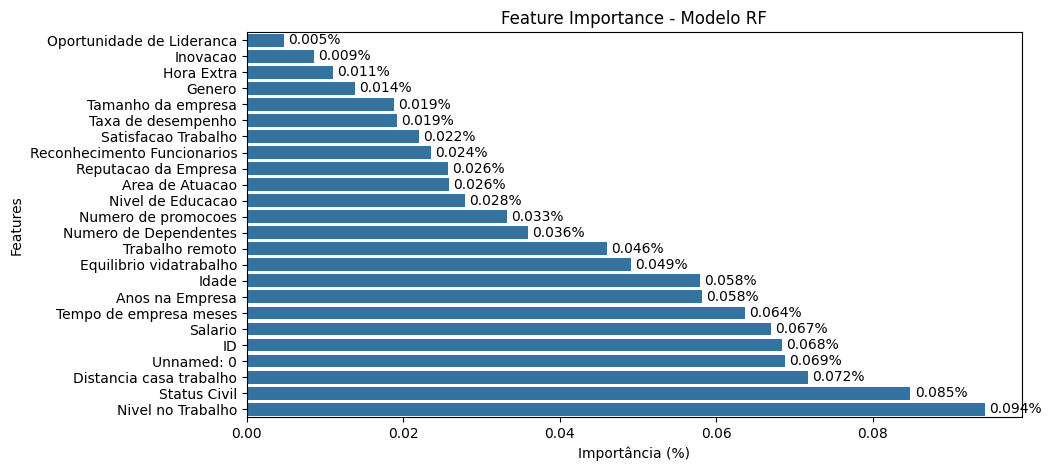

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar gráfico de barras horizontais
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=importancia_bd["importancia"],
                 y=importancia_bd["feature"])

# Adicionar rótulos nas barras
for bar in ax.containers:
    ax.bar_label(bar, fmt="%.3f%%",
                 label_type="edge",
                 padding=3,
                 fontsize=10)

# Adicionar rótulos e título
plt.xlabel("Importância (%)")
plt.ylabel("Features")
plt.title("Feature Importance - Modelo RF")

# Inverter eixo Y para ordenar corretamente
plt.gca().invert_yaxis()

# Mostrar gráfico
plt.show()